In [189]:
import pickle
import json
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, f1_score
import copy

In [190]:
obsGLI = None
with open('obsgli.json') as f:
    obsGLI = json.load(f)

obsGold = None
with open('obs.json') as f:
    obsGold = json.load(f)

resGLI = None
with open('resgli.json') as f:
    resGLI = json.load(f)

resGold = None
with open('res.json') as f:
    resGold = json.load(f)

In [191]:
modelObsGLI = pickle.load(open('modelObsGLI.pkl', 'rb'))
modelObsGLIClassification = pickle.load(open('modelObsClassificationGLI.pkl', 'rb'))
modelResGLI = pickle.load(open('modelResGLI.pkl', 'rb'))
modelObsGold = pickle.load(open('modelObsGold.pkl', 'rb'))
modelResGold = pickle.load(open('modelResGold.pkl', 'rb'))

## Datasets

## Obstruction

### GLI

##### Normal

In [192]:
obsGLICopy = copy.deepcopy(obsGLI)

xObs = []
yObs = []
for item in obsGLICopy:
    yObs.append(item['Obstruction'])
    del item['Obstruction']
    xObs.append(list(item.values()))

xObsTrain, xObsVal, yObsTrain, yObsVal = train_test_split(xObs, yObs, test_size=0.25, random_state=42)

In [193]:
print("MAE score for val:", mean_absolute_error(yObsVal, modelObsGLI.predict(pd.DataFrame(xObsVal))))
print("MAE score for train:", mean_absolute_error(yObsTrain, modelObsGLI.predict(pd.DataFrame(xObsTrain))))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
MAE score for val: 0.3094766304431552
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step
MAE score for train: 0.39487326434173153


##### Classification

In [194]:
def n_acurracy(m, dX, dY, n=1):
    l = m.predict(pd.DataFrame(dX)).tolist()
    s = 0

    for p in l:
        for i in range(len(p)):
            p[i] = (p[i], i)
        p.sort(reverse=True)

    #print(l)

    for i in range(n):
        for j in range(len(dX)):
            if dY[j] == l[j][i][1]:
                s += 1

    return s / len(dX)

def n_f1_score(model, X, y, n=1):
    # Get predictions (these are already probabilities if using softmax)
    y_prob = model.predict(pd.DataFrame(X))
    
    # Get top n predictions for each sample
    top_n_preds = []
    for prob in y_prob:
        # Get indices of top n highest probabilities
        top_n_indices = np.argsort(prob)[-n:][::-1]
        top_n_preds.append(top_n_indices)
    
    y_pred = []
    for i, preds in enumerate(top_n_preds):
        y_pred.append(y[i] if y[i] in preds else preds[0])
    
    return f1_score(y, y_pred, average='weighted')

In [195]:
obsGLICopy2 = copy.deepcopy(obsGLI)

xObs = []
yObs = []
for item in obsGLICopy2:
    yObs.append(item['Obstruction'])
    del item['Obstruction']
    xObs.append(list(item.values()))

xObsTrain, xObsVal, yObsTrain, yObsVal = train_test_split(xObs, yObs, test_size=0.25, random_state=42)

In [196]:
print("Train:")
print("Train accuracy with top 1:", n_acurracy(modelObsGLIClassification, xObsTrain, yObsTrain))
print("Train accuracy with top 2", n_acurracy(modelObsGLIClassification, xObsTrain, yObsTrain, 2))
print("Train f1 score with top 1", n_f1_score(modelObsGLIClassification, xObsTrain, yObsTrain))
print("Train f1 score with top 2", n_f1_score(modelObsGLIClassification, xObsTrain, yObsTrain, 2))

print("Val:")
print("Val accuracy with top 1:", n_acurracy(modelObsGLIClassification, xObsVal, yObsVal))
print("Val accuracy with top 2", n_acurracy(modelObsGLIClassification, xObsVal, yObsVal, 2))
print("Val f1 score with top 1", n_f1_score(modelObsGLIClassification, xObsVal, yObsVal))
print("Val f1 score with top 2", n_f1_score(modelObsGLIClassification, xObsVal, yObsVal, 2))

Train:
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step
Train accuracy with top 1: 0.8875
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step
Train accuracy with top 2 0.96875
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step
Train f1 score with top 1 0.8527556818181818
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
Train f1 score with top 2 0.9628078403078405
Val:
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Val accuracy with top 1: 0.8703703703703703
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Val accuracy with top 2 0.9629629629629629
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Val f1 score with top 1 0.8591911309302614
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Val f1 score with top 2 0.9517435564219191


### Gold

In [197]:
obsGoldCopy = copy.deepcopy(obsGold)

xObs = []
yObs = []
for item in obsGoldCopy:
    yObs.append(obsGoldCopy[item]['obstruction'])
    del obsGoldCopy[item]['obstruction']
    xObs.append(list(obsGoldCopy[item].values()))

xObsTrain, xObsVal, yObsTrain, yObsVal = train_test_split(xObs, yObs, test_size=0.25, random_state=42)

In [198]:
print("MAE score val:", mean_absolute_error(yObsVal, modelObsGold.predict(pd.DataFrame(xObsVal))))
print("MAE score train:", mean_absolute_error(yObsTrain, modelObsGold.predict(pd.DataFrame(xObsTrain))))

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MAE score val: 0.7986502368515784
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step
MAE score train: 0.7955585514232288


## Restriction

### GLI

In [199]:
resGLICopy = copy.deepcopy(resGLI)

xObs = []
yObs = []
for item in resGLICopy:
    yObs.append(item['Restriction'])
    del item['Restriction']
    xObs.append(list(item.values()))

xObsTrain, xObsVal, yObsTrain, yObsVal = train_test_split(xObs, yObs, test_size=0.25, random_state=42)

0.9629629629629629
0.888888888888889
[[44  0]
 [ 2  8]]
0.93125
0.7659574468085106
[[131   9]
 [  2  18]]


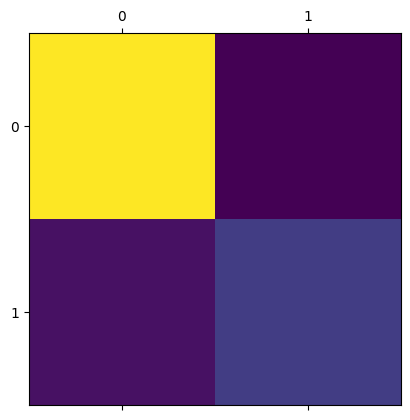

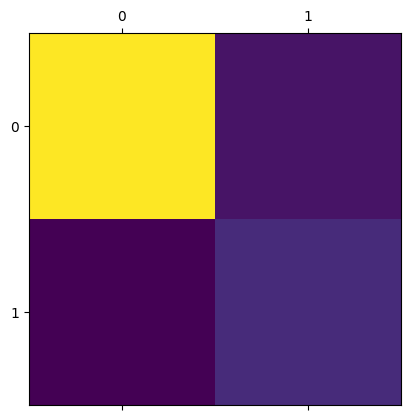

In [200]:
print(accuracy_score(yObsVal, modelResGLI.predict(pd.DataFrame(xObsVal))))
print(f1_score(yObsVal, modelResGLI.predict(pd.DataFrame(xObsVal))))
matrix = confusion_matrix(yObsVal, modelResGLI.predict(pd.DataFrame(xObsVal)))

print(matrix)
plt.matshow(matrix)

print(accuracy_score(yObsTrain, modelResGLI.predict(pd.DataFrame(xObsTrain))))
print(f1_score(yObsTrain, modelResGLI.predict(pd.DataFrame(xObsTrain))))
matrix_train = confusion_matrix(yObsTrain, modelResGLI.predict(pd.DataFrame(xObsTrain)))

print(matrix_train)
plt.matshow(matrix_train)

### Gold

In [201]:
resGoldCopy = copy.deepcopy(resGold)

xObs = []
yObs = []
for item in resGoldCopy:
    yObs.append(resGoldCopy[item]['restriction'])
    del resGoldCopy[item]['restriction']
    xObs.append(list(resGoldCopy[item].values()))

xObsTrain, xObsVal, yObsTrain, yObsVal = train_test_split(xObs, yObs, test_size=0.25, random_state=42)

0.7553516819571865
0.047619047619047616
[[245  78]
 [  2   2]]
0.6921508664627931
0.08484848484848484
[[665 299]
 [  3  14]]


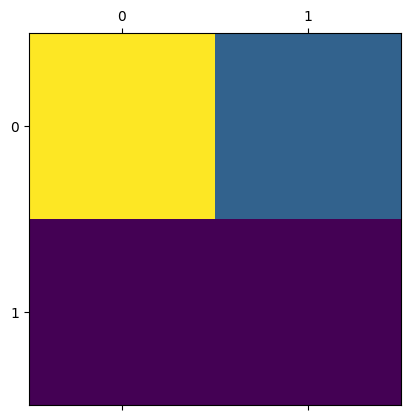

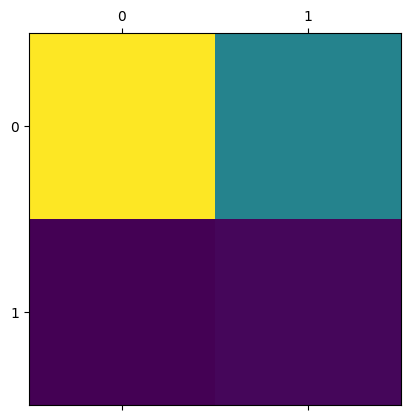

In [202]:
print(accuracy_score(yObsVal, modelResGold.predict(pd.DataFrame(xObsVal))))
print(f1_score(yObsVal, modelResGold.predict(pd.DataFrame(xObsVal))))
matrix = confusion_matrix(yObsVal, modelResGold.predict(pd.DataFrame(xObsVal)))

print(matrix)
plt.matshow(matrix)

print(accuracy_score(yObsTrain, modelResGold.predict(pd.DataFrame(xObsTrain))))
print(f1_score(yObsTrain, modelResGold.predict(pd.DataFrame(xObsTrain))))
matrix_train = confusion_matrix(yObsTrain, modelResGold.predict(pd.DataFrame(xObsTrain)))

print(matrix_train)
plt.matshow(matrix_train)